# 数据绘图要点7-过度绘图
过度绘图是数据绘图中的一个常见问题。当您的数据集很大时，散点图的点往往会重叠，使图形不可读。在这篇文章中，将给出多种解决方法来避免过度绘图。

## 过度绘图实例

下面的散点图中说明了过度绘图存在的问题。乍一看可能会得出这样的结论：X 和 Y 之间没有明显的关系。但后续我们将证明这个结论是多么错误。

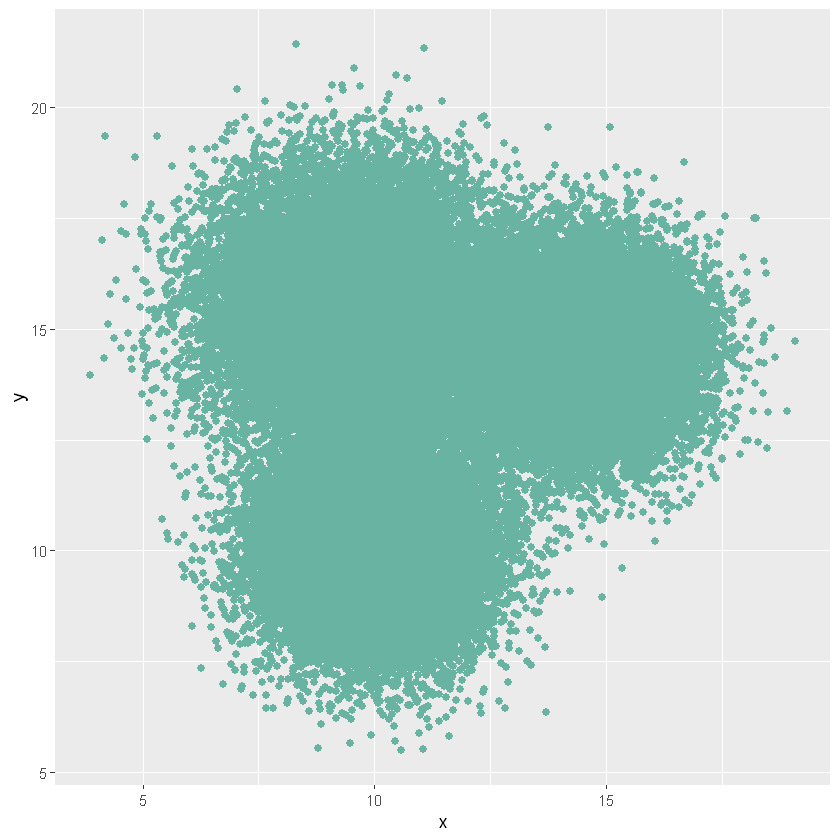

In [8]:
# # 加载库
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(patchwork)

# Dataset:
a <- data.frame( x=rnorm(20000, 10, 1.2), y=rnorm(20000, 10, 1.2), group=rep("A",20000))
b <- data.frame( x=rnorm(20000, 14.5, 1.2), y=rnorm(20000, 14.5, 1.2), group=rep("B",20000))
c <- data.frame( x=rnorm(20000, 9.5, 1.5), y=rnorm(20000, 15.5, 1.5), group=rep("C",20000))
# 拼接数据
data <- do.call(rbind, list(a,b,c))               

# 绘图
ggplot(data,aes(x=x, y=y)) +
geom_point(color="#69b3a2", size=2) +
theme(
  legend.position="none"
)

## 解决方法

### 减少点的尺寸

最简单的解决方法可能是减少点的尺寸，它可以提供非常令人满意的结果。在这里可以清楚地看到存在3个集群，这在上图中被隐藏了。

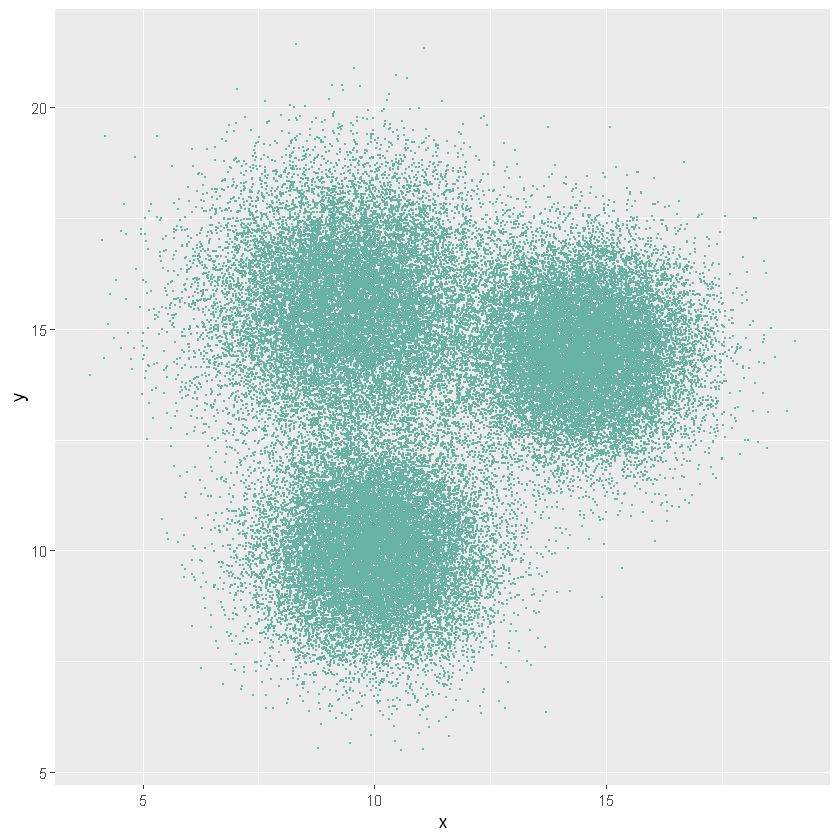

In [10]:
ggplot(data,aes(x=x, y=y)) +
# 减少点的尺寸
geom_point(color="#69b3a2", size=0.02) +
theme(
  legend.position="none"
)

### 透明度

结合减小点的大小，使用透明度还可以进一步解决过度绘图问题。



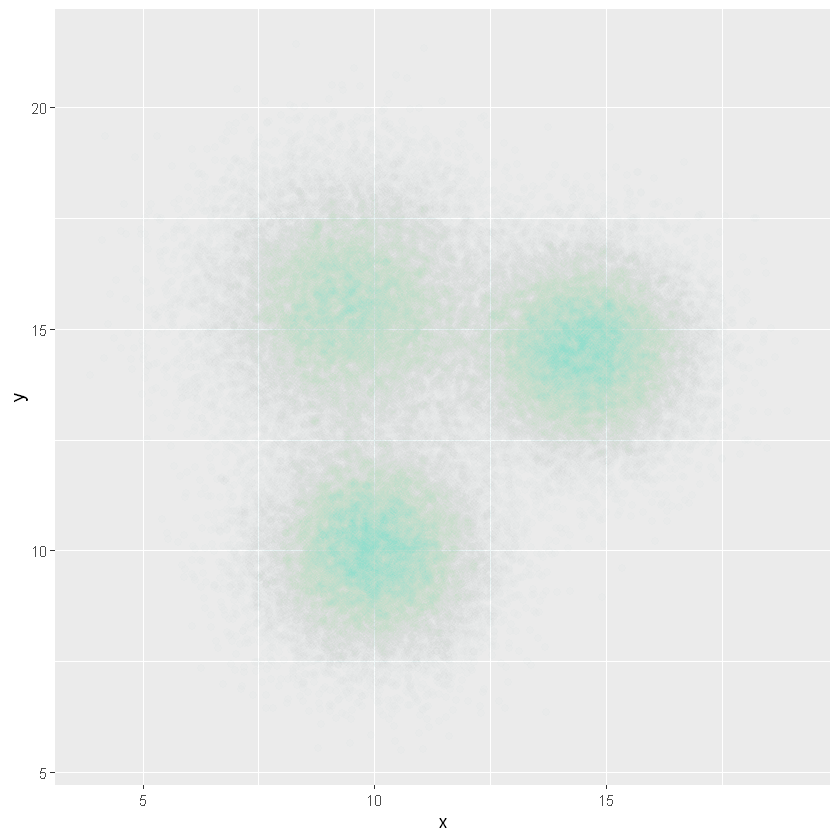

In [12]:
ggplot(data,aes(x=x, y=y)) +
# 设置透明度
geom_point(color="#69b3a2", size=2, alpha=0.01) +
theme(
  legend.position="none"
)

### 2维密度图

二维密度图基本上计算二维空间特定区域内的观察次数，并用颜色表示此计数，可以清晰看出点的分布情况

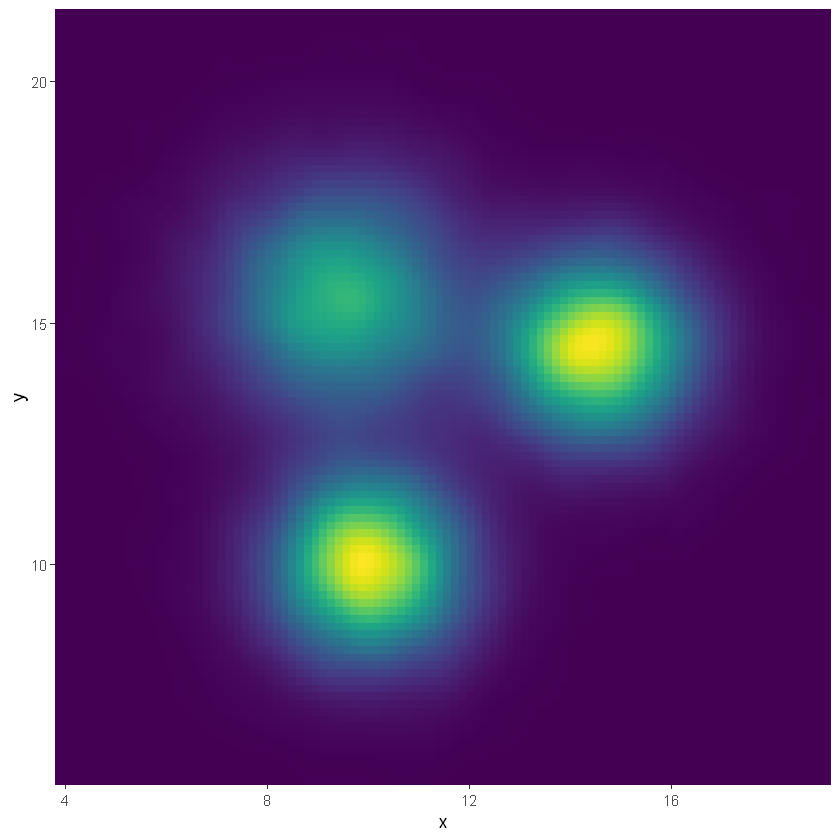

In [16]:
# 绘制2维密度图
ggplot(data, aes(x=x, y=y) ) +
  stat_density_2d(aes(fill = ..density..), geom = "raster", contour = FALSE) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0)) +
  scale_fill_viridis() +
  theme(
    legend.position='none'
  )

### 数据采样

有时少即是多。仅绘制一小部分数据（此处为 5%）可以大大减少计算时间并有助于避免过度绘制：



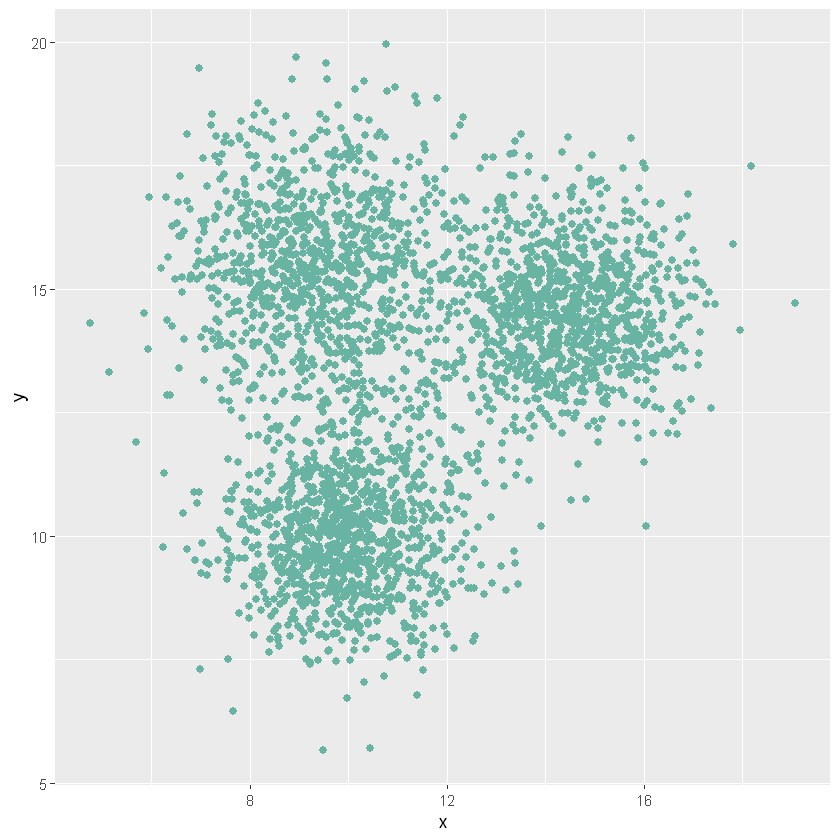

In [17]:
sample_data <- sample_frac(data, 0.05)
ggplot(sample_data, aes(x=x, y=y)) +
geom_point(color="#69b3a2", size=2) +
theme(
  legend.position="none"
)

### 突出显示特定组

降低图形复杂性的另一种方法是突出显示特定组。

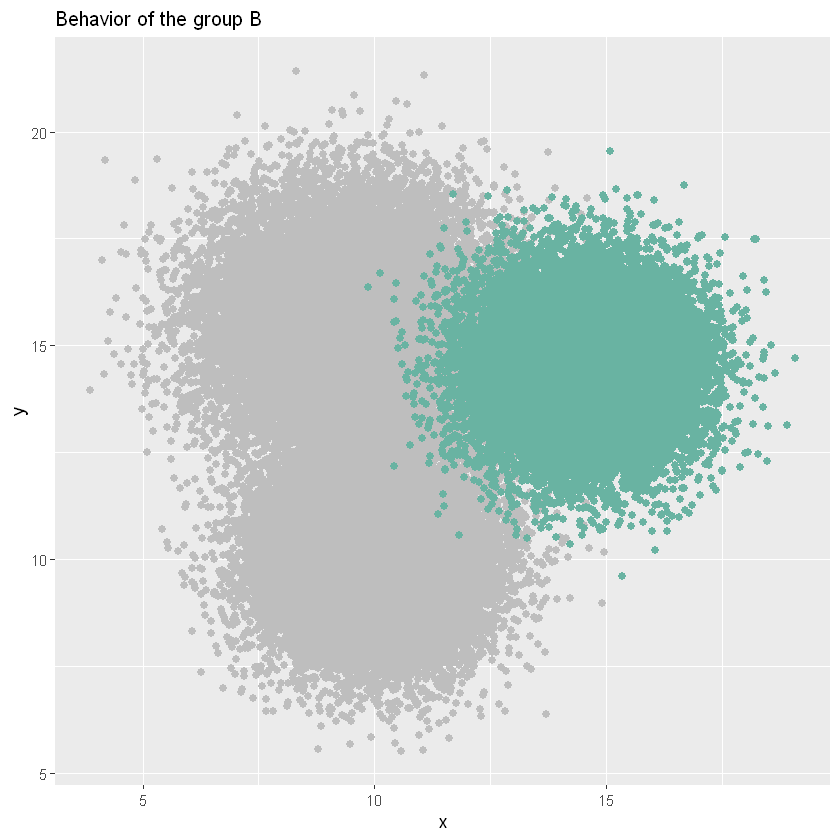

In [19]:
ggplot( data,aes(x=x, y=y)) +
geom_point(color="grey", size=2) +
# 突出显示组B
geom_point(data = data %>% filter(group=="B"), color="#69b3a2", size=2) +
theme(
  legend.position="none",
  plot.title = element_text(size=12)
) +
ggtitle('Behavior of the group B') 

### 分组

如果数据有分组的话，可以用不同颜色表示不同组的点。

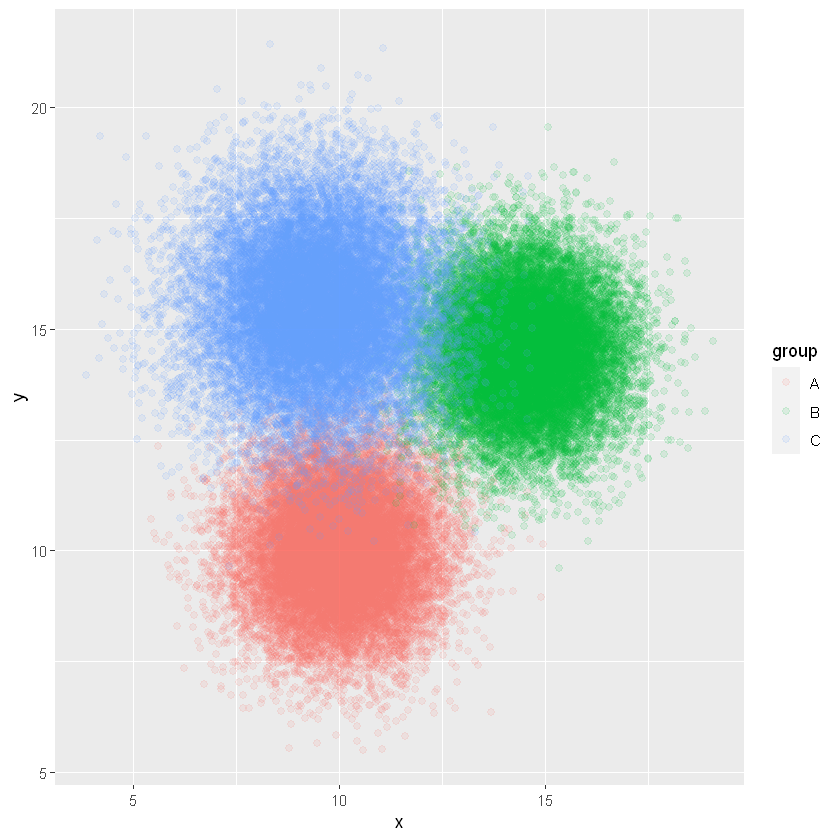

In [22]:
ggplot(data, aes(x=x, y=y, color=group)) +
geom_point( size=2, alpha=0.1) +
scale_color_viridis(discrete=TRUE) 

### 分图
一旦您的图中有多个组，另一种方法是使用分图，每次突出显示一个组。

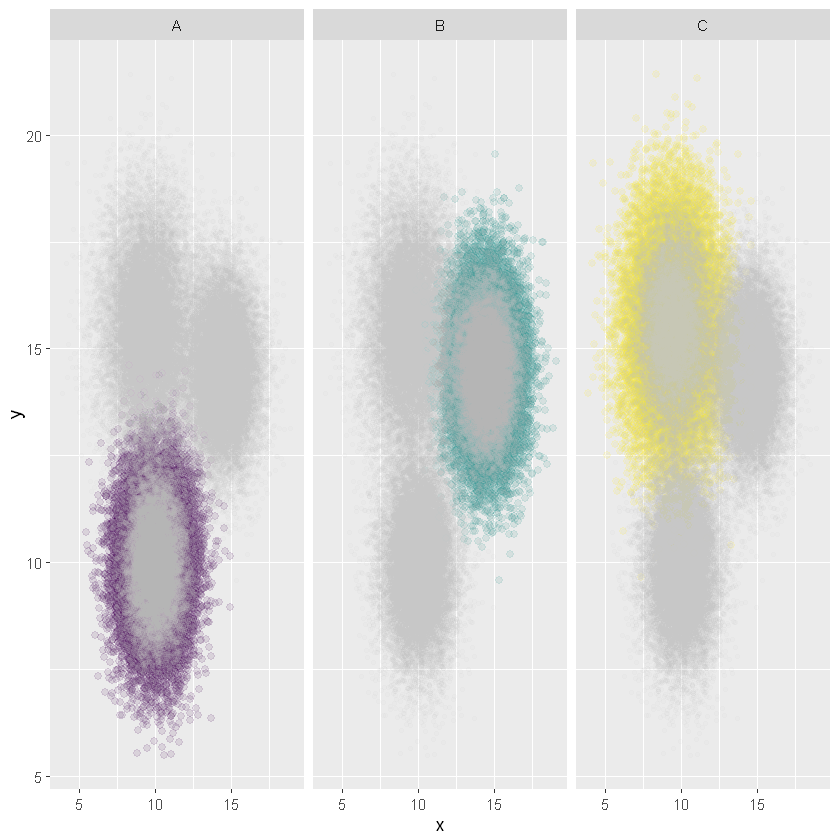

In [25]:
ggplot(data, aes(x=x, y=y)) +
# 画突出显示类别的点
geom_point( aes( color=group) , size=2, alpha=0.1) +
# 画不突出显示类别的点
geom_point( data=data %>% select(-group), size=1, alpha=0.05, color="grey") +
scale_color_viridis(discrete=TRUE) +
theme(
  legend.position="none",
) +
# 分图
facet_wrap(~group)

### 三维图

使用三维图来显示密度，在这种情况下，各组的位置变得明显。

```
library(plotly)
library(MASS)

kd <- with(data, MASS::kde2d(x, y, n = 50))

plot_ly(x = kd$x, y = kd$y, z = kd$z) %>% add_surface()
```

### 边缘分布

添加边缘分布允许您检测隐藏在图形过度绘制部分中的分布。您可以在边缘中添加箱形图、直方图或密度图。

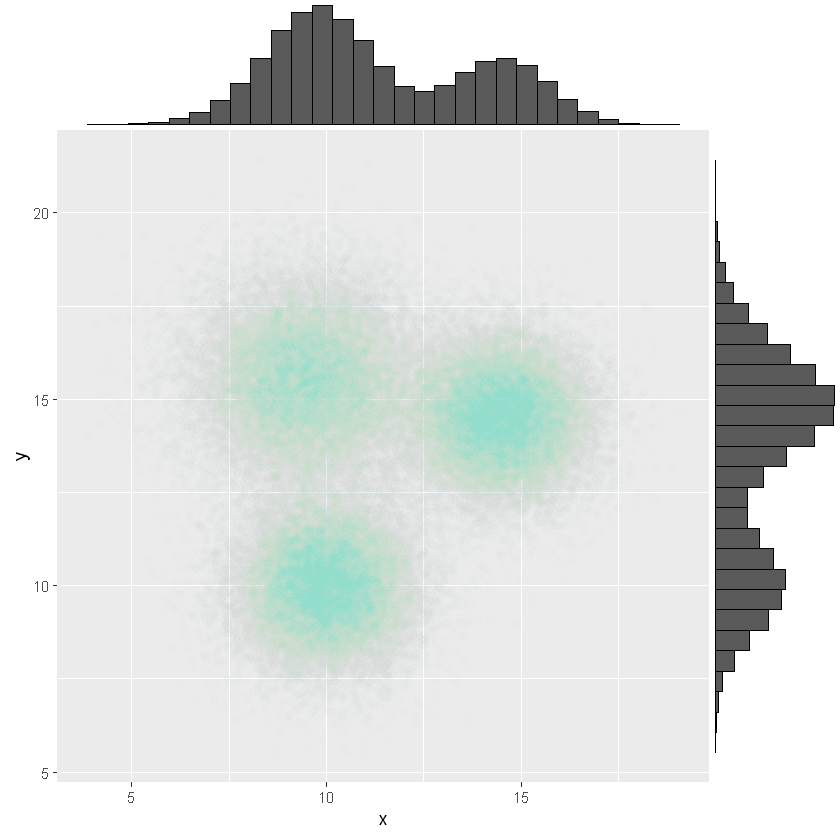

In [29]:
library(ggExtra)

# 创建散点图
p <- ggplot(data, aes(x=x, y=y)) +
    geom_point(color="#69b3a2", size=2, alpha=0.01) +
    theme(
      legend.position="none"
    )

# 添加边缘直方图
ggExtra::ggMarginal(p, type = "histogram")

## 参考

+ [HOW TO AVOID OVERPLOTTING](https://www.data-to-viz.com/caveat/overplotting.html)